# Stellar Classification

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

In [2]:
df = pd.read_csv("data/star_classification.csv")
df.shape

(100000, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Overview

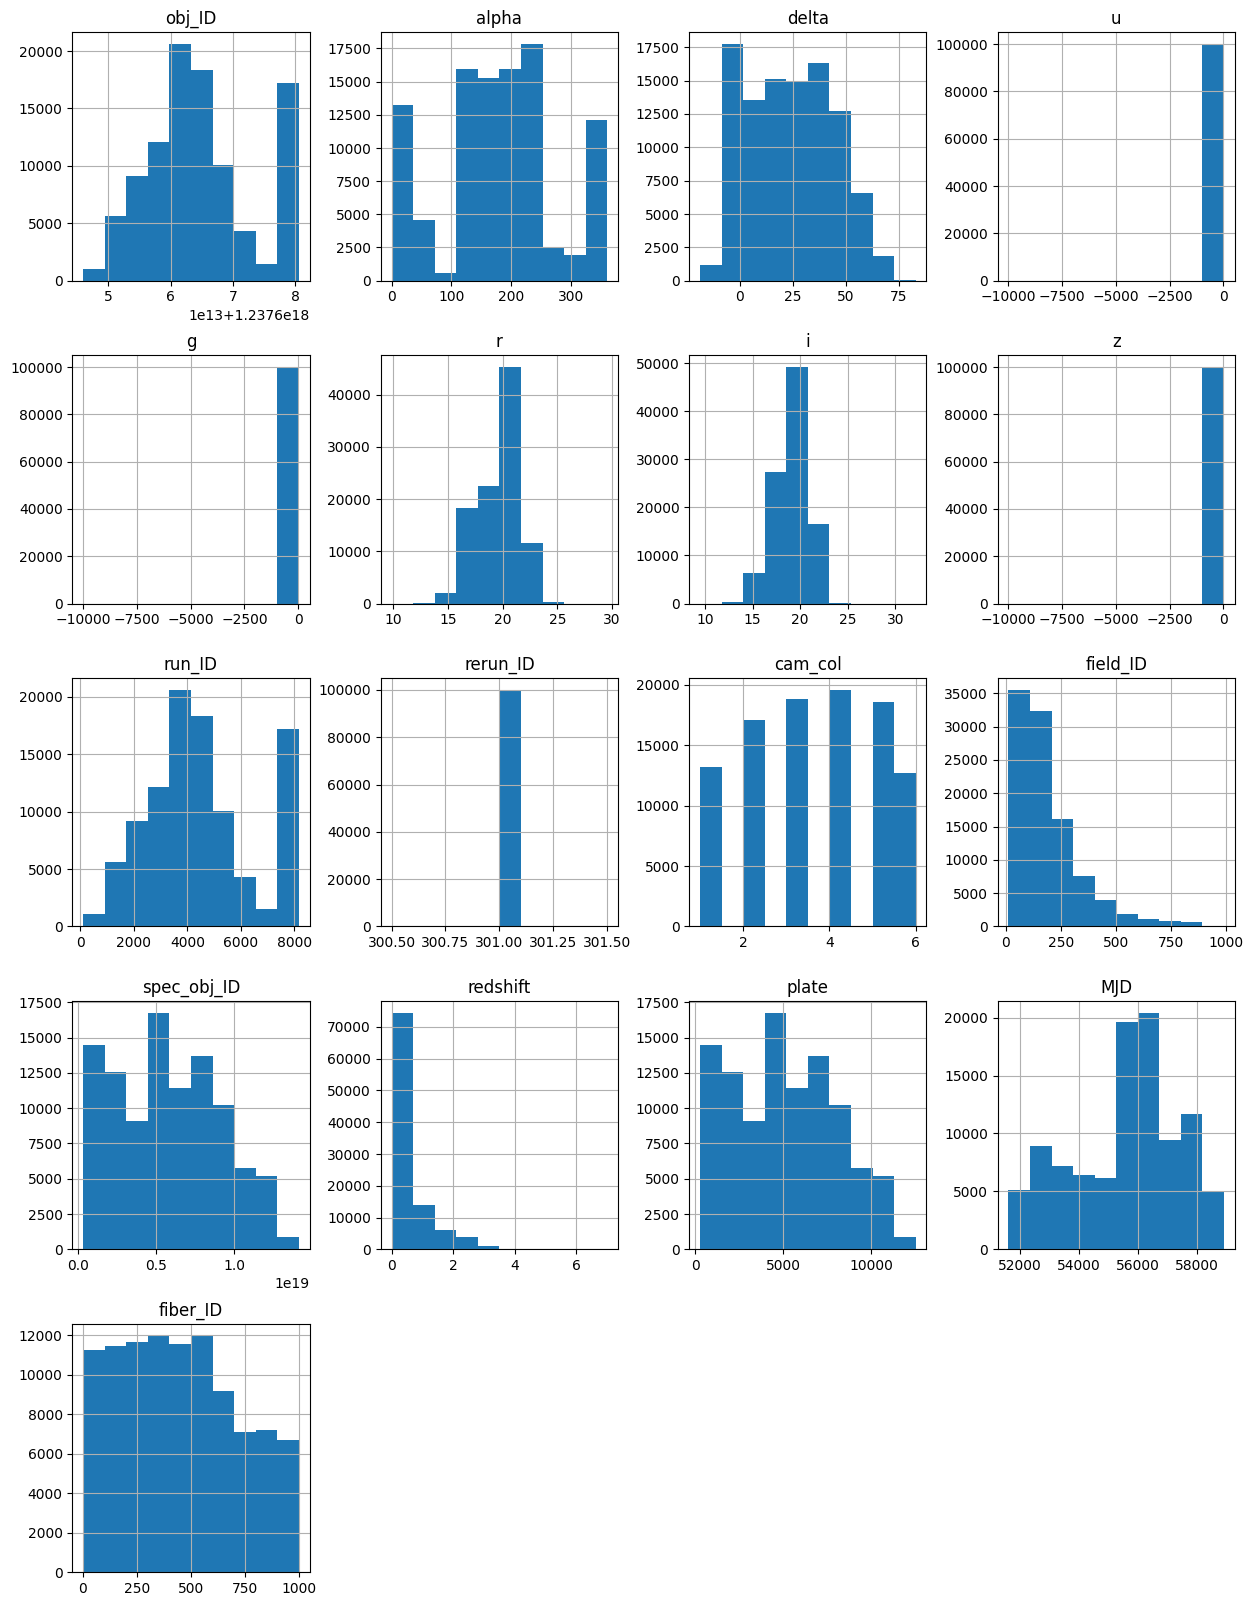

In [5]:
df.hist(figsize=(15,20))
plt.show()

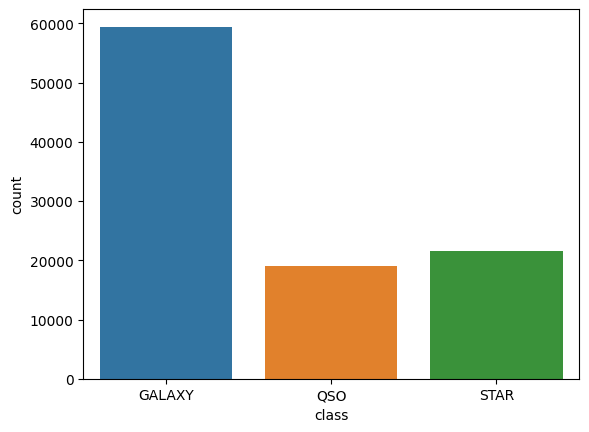

In [6]:
sns.countplot(x="class", data=df)
plt.show()

In [7]:
target = "class"
classes = ['GALAXY','STAR','QSO']
df["class"] = df['class'].astype("category")
df['class_code'] = df['class'].cat.codes

In [8]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,class_code
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,0


In [9]:
df.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,class_code
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,0
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851,0


In [10]:
df.sample(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,class_code
73435,1.237680e+18,356.604942,27.152207,22.97842,22.30188,22.02719,21.99018,21.87706,8110,301,3,210,8.666209e+18,QSO,2.424147,7697,57574,571,1
97828,1.237665e+18,227.205679,26.074512,25.93030,22.23787,20.49884,19.40202,18.94274,4576,301,1,696,6.777032e+18,GALAXY,0.522749,6019,56074,875,0
93277,1.237661e+18,210.023858,46.358827,19.70778,18.87636,18.56899,18.50202,18.43253,3650,301,2,122,7.599917e+18,STAR,-0.000184,6750,56367,337,2
82905,1.237653e+18,19.264767,-9.281970,20.63806,19.79124,19.48366,19.41624,19.35576,1740,301,4,149,3.224726e+18,STAR,0.000812,2864,54467,542,2
9964,1.237665e+18,213.438800,26.550882,18.33570,16.52953,15.71124,15.32506,15.01625,4649,301,3,194,6.766858e+18,GALAXY,0.064402,6010,56097,726,0
56526,1.237659e+18,211.524871,57.975335,21.51023,18.90250,17.54932,17.02239,16.69813,3225,301,5,42,1.305061e+18,GALAXY,0.216911,1159,52669,521,0
99879,1.237680e+18,334.499202,20.442221,24.57772,22.62903,20.92822,20.10227,19.59758,8102,301,5,69,5.655626e+18,GALAXY,0.462319,5023,55858,839,0
78592,1.237679e+18,351.482078,3.532518,24.72224,26.17733,22.98058,21.13360,19.83986,7712,301,6,273,1.271053e+19,GALAXY,0.835703,11289,58398,889,0
35295,1.237665e+18,152.533272,30.056888,23.58002,21.59371,19.78820,19.02188,18.64948,4516,301,1,173,1.281397e+19,GALAXY,0.452905,11381,58464,374,0
97506,1.237664e+18,146.562710,67.296246,20.61333,18.60944,17.48270,16.96331,16.56716,4294,301,2,223,2.114611e+18,GALAXY,0.120013,1878,54474,623,0


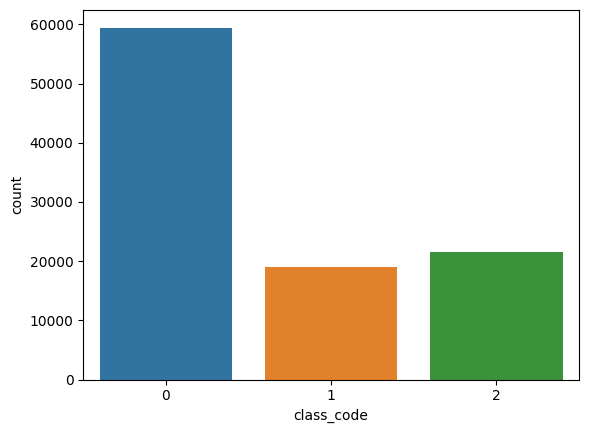

In [11]:
sns.countplot(x="class_code", data=df)
plt.show()

In [12]:
df.isnull().sum().sort_values(ascending=False)

obj_ID         0
cam_col        0
fiber_ID       0
MJD            0
plate          0
redshift       0
class          0
spec_obj_ID    0
field_ID       0
rerun_ID       0
alpha          0
run_ID         0
z              0
i              0
r              0
g              0
u              0
delta          0
class_code     0
dtype: int64

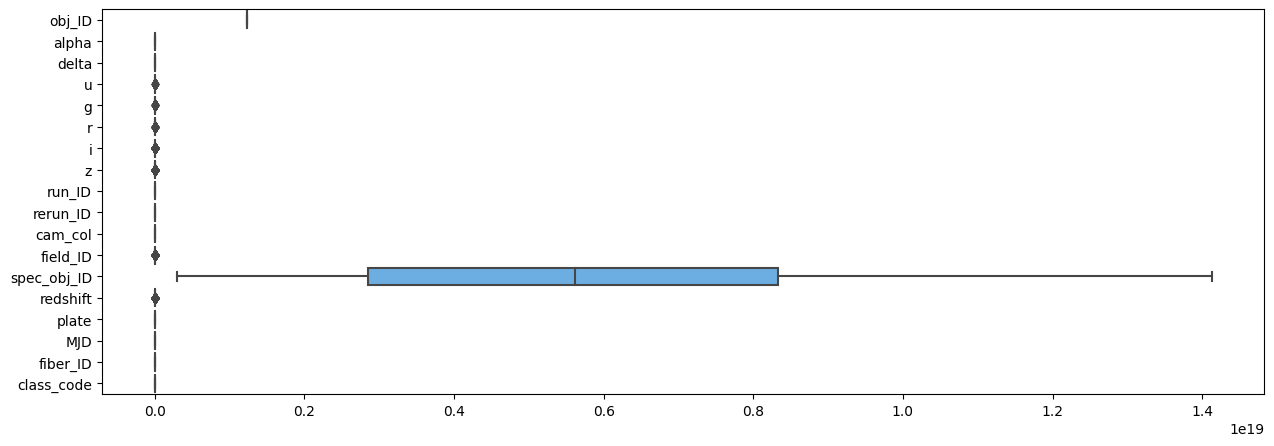

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, orient="h")
plt.show()

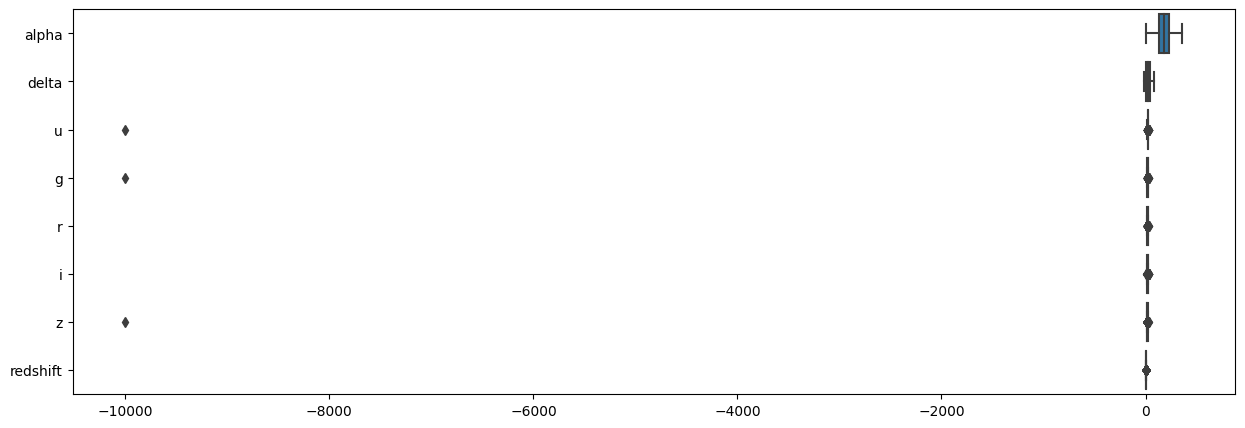

In [14]:
# need to "zoom out" to see the ones with smaller ranges
#df_box = df.drop(columns=['obj_ID', 'spec_obj_ID', 'MJD', 'run_ID', 'plate'])
df_box = df.loc[:, ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
plt.figure(figsize=(15,5))
sns.boxplot(data=df_box, orient="h")
plt.show()

In [15]:
# There's one outlier that will skew some visualziations later.  Let's just drop it.
dropped_rows = df[ df['z'] < -9500  ]
df.drop(index=[ df['z'].idxmin() ], inplace=True)
dropped_rows

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,class_code
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162,2


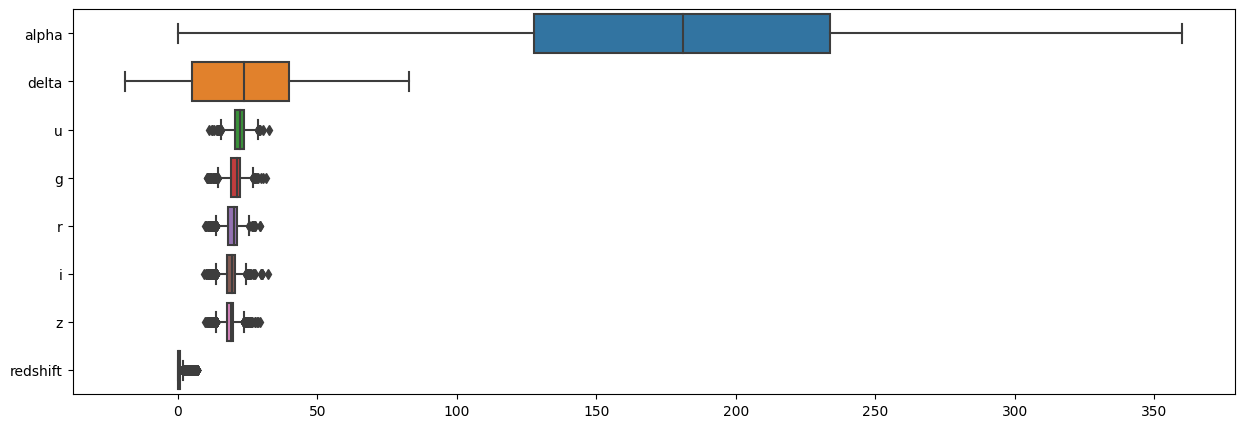

In [16]:
df_box = df.loc[:, ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
plt.figure(figsize=(15,5))
sns.boxplot(data=df_box, orient="h")
plt.show()

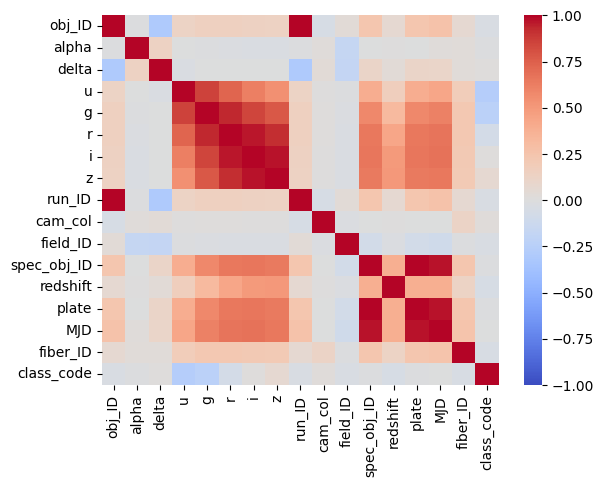

In [17]:
# correlation for rerun_ID return Nan, so let's just ignore it for now
cor = df.drop(columns=["rerun_ID"]).corr(numeric_only=True)
sns.heatmap(cor, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## Model Selection

In [18]:
df_clean = df.drop("class", axis=1)

In [19]:
X = df_clean.drop("class_code", axis=1)
y = df_clean['class_code']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (74999, 17)
Shape of X_test: (25000, 17)


In [21]:
%%time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

models = {
    'cart': DecisionTreeClassifier(random_state=0),
    'rf': RandomForestClassifier(random_state=0),
    'lda': LinearDiscriminantAnalysis(), 
    'knn': KNeighborsClassifier()
}

print("Model\tTrain\tTest")
scores = { }
for k, m in models.items():
    m.fit(X_train, y_train)
    score_train = m.score(X_train, y_train)
    score_test = m.score(X_test, y_test)
    scores[k] = [ score_train, score_test ]
    print(f"{k}:\t{score_train:>5.3f}\t{score_test:>5.3f}")
    
print("---")

Model	Train	Test
cart:	1.000	0.966
rf:	1.000	0.978
lda:	0.854	0.856
knn:	0.774	0.705
---
CPU times: user 1min 53s, sys: 2.5 s, total: 1min 56s
Wall time: 52.7 s


## Further Development with Random Forest

In [22]:
model = models['rf']

In [23]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     14821
        STAR       0.97      0.93      0.95      4738
         QSO       0.99      1.00      0.99      5441

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000



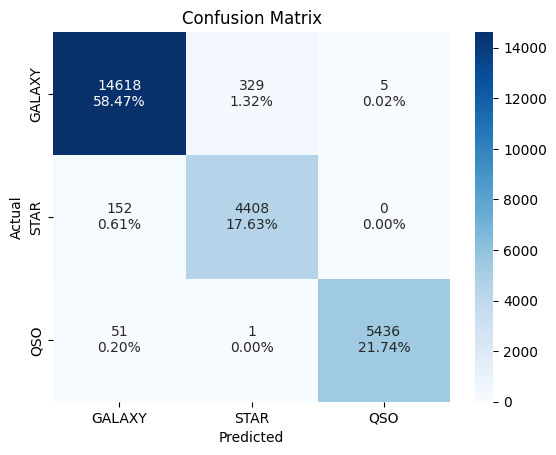

In [24]:
conf_mat = metrics.confusion_matrix(y_pred, y_test)

group_counts = [ "{0:0.0f}".format(v) for v in conf_mat.flatten() ]
group_percentages = [ "{0:.2%}".format(v) for v in conf_mat.flatten()/np.sum(conf_mat) ]
labels = [ f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages) ]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

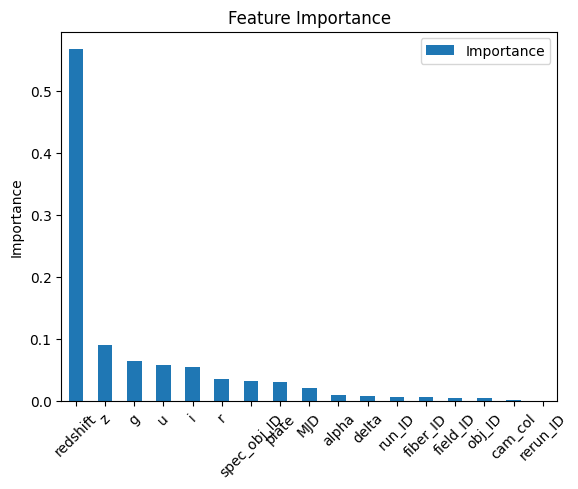

In [25]:
imp_df = pd.DataFrame(
    model.feature_importances_, 
    index = X_train.columns, 
    columns = ["Importance"]
)
imp_df.sort_values(by='Importance', ascending=False, inplace=True)
imp_df.plot(kind='bar')
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

### Feature Selection

In [26]:
cols_to_drop = [ 'rerun_ID', 'cam_col', 'obj_ID', 'field_ID', 'fiber_ID', 'run_ID', 'alpha', 'delta', 'MJD', 'plate',  'spec_obj_ID' ]
df_pruned = df_clean.drop(cols_to_drop, axis=1)

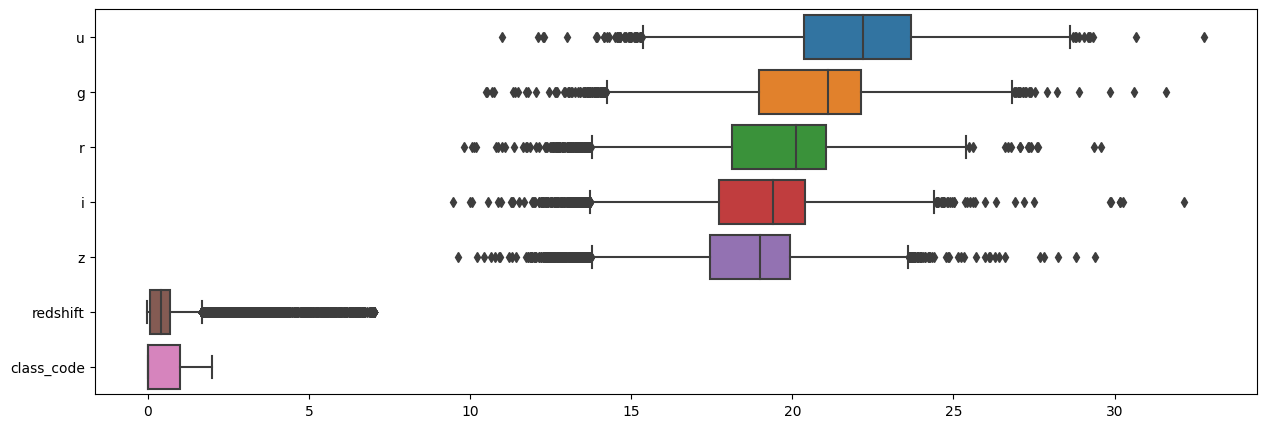

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_pruned, orient="h")
plt.show()

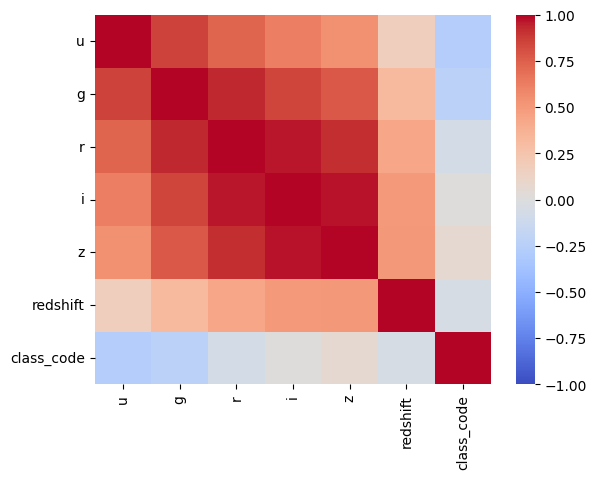

In [28]:
cor = df_pruned.corr(numeric_only=True)
sns.heatmap(cor, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

### Retraining

In [29]:
%%time
X2 = df_pruned.drop("class_code", axis=1)
y2 = df_pruned['class_code']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=0)

model2 = RandomForestClassifier(
    random_state=0, 
    #n_estimators=500
)
model2.fit(X_train2, y_train2)

score_train2 = model2.score(X_train2, y_train2)
score_test2 = model2.score(X_test2, y_test2)

print("Model\tTrain\tTest")
print(f"  orig:\t{scores['rf'][0]:>6.4f}\t{scores['rf'][1]:>6.4f}")
print(f"pruned:\t{score_train2:>6.4f}\t{score_test2:>6.4f}")


print("---")

Model	Train	Test
  orig:	1.0000	0.9785
pruned:	1.0000	0.9790
---
CPU times: user 20.2 s, sys: 0 ns, total: 20.2 s
Wall time: 20.2 s


In [30]:
y_pred2 = model2.predict(X_test2)
print(metrics.classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14821
           1       0.97      0.93      0.95      4738
           2       1.00      1.00      1.00      5441

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



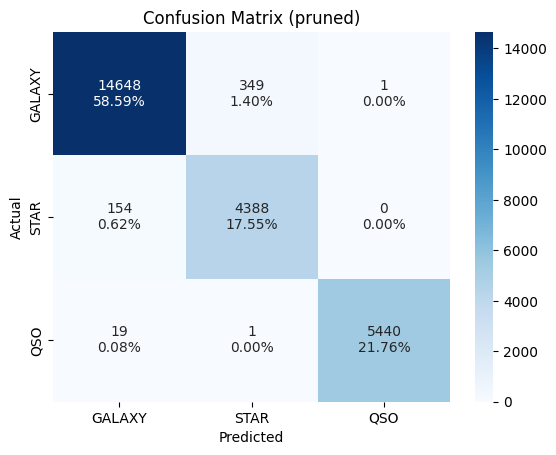

In [31]:
conf_mat2 = metrics.confusion_matrix(y_pred2, y_test2)

group_counts = [ "{0:0.0f}".format(v) for v in conf_mat2.flatten() ]
group_percentages = [ "{0:.2%}".format(v) for v in conf_mat2.flatten()/np.sum(conf_mat2) ]
labels = [ f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages) ]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(conf_mat2, annot=labels, fmt='', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (pruned)")
plt.show()

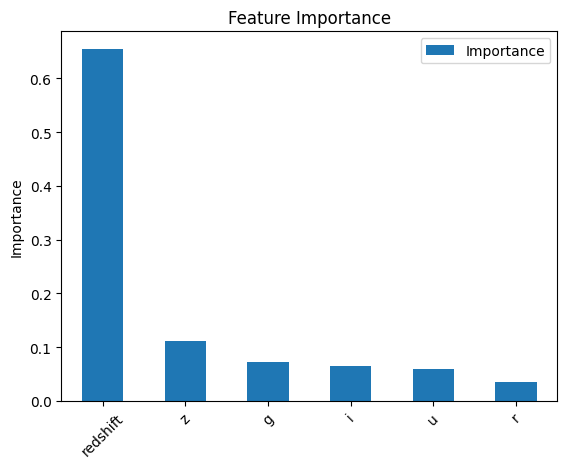

In [32]:
imp_df2 = pd.DataFrame(
    model2.feature_importances_, 
    index = X_train2.columns, 
    columns = ["Importance"]
)
imp_df2.sort_values(by='Importance', ascending=False, inplace=True)
imp_df2.plot(kind='bar')
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.show()

## Other Analysis

In [33]:
%%time
#sns.pairplot(data=df_pruned, hue="class_code", height=2, palette="tab10")

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


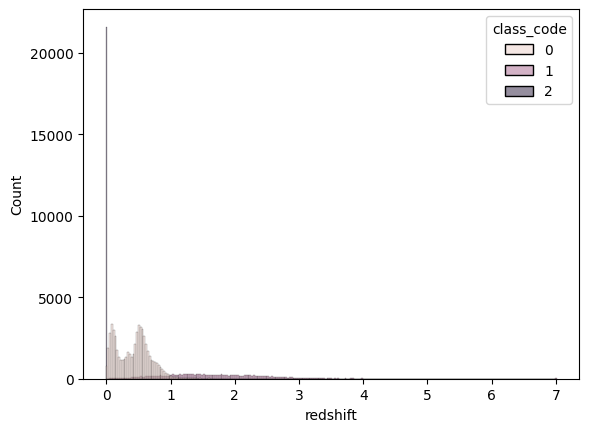

In [34]:
sns.histplot(data=df_pruned, x="redshift", hue="class_code")
plt.show()

In [ ]:
sns.boxplot(data=df_pruned, x="redshift", y="class_code")
plt.show()